## Time to get your hands dirty! Planning a telescope observation
#### Tasks

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.
- Use a summary statistics to determine the most likely value and an error on our estimate.

**Important:** 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***


#### Tasks

- In the above example, experiment with chopping off different numbers of initial points as burn-in.


#### More

- Redo the same for the Markovian process describing the stock market (see above in this notebook). If you've written your code well, this should require minor modifications.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import astroML.stats
from astropy.visualization.hist import hist as fancyhist

## Planning a telescope observation

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)

- 1 = clear   
- 0 = cloudy

In [2]:
#Building the Markov chain
N = 10**4
observation = [0]

values_observation = [0, 1]  
for i in tqdm(range(N-1)):
    if observation[i] == 0:
        observation.append(np.random.choice(values_observation, p = [0.5, 0.5]))  #This function chooses between 0 and 1 with a specific probability
    if observation[i] == 1:                                                       #for each value
        observation.append(np.random.choice(values_observation, p = [0.1, 0.9]))
    
observation = np.array(observation)

100%|██████████| 9999/9999 [00:00<00:00, 30794.89it/s]


In [3]:
print('Probability of a clear day: %0.2f%%' %(len(observation[observation==1])*100/len(observation)))
print('Probability of a cloudy day: %0.2f%%' %(len(observation[observation==0])*100/len(observation)))

Probability of a clear day: 82.76%
Probability of a cloudy day: 17.24%


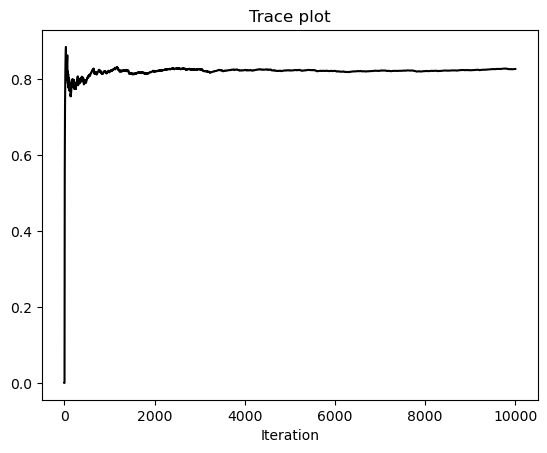

In [4]:
#Plotting the trace of the chain
trace = np.cumsum(observation)/np.arange(1, len(observation) + 1)
plt.plot(trace, color = 'black')
plt.title('Trace plot')
plt.xlabel('Iteration')
plt.show()

In [5]:
#Printing the summary statistics with and without burn-in
burnin = 2000

print('Summary statistics with burn-in:')
print('Mean = %f' %np.mean(trace))
print('Median = %f' %np.median(trace))
print('SigmaG = %f' %astroML.stats.sigmaG(trace))
print('Min = %f\nMax =  %f' %(min(trace), max(trace)))

print('\nSummary statistics without burn-in:')
print('Mean = %f' %np.mean(trace[burnin:]))
print('Median = %f' %np.median(trace[burnin:]))
print('SigmaG = %f' %astroML.stats.sigmaG(trace[burnin:]))
print('Min = %f\nMax =  %f' %(min(trace[burnin:]), max(trace[burnin:])))

Summary statistics with burn-in:
Mean = 0.821336
Median = 0.823263
SigmaG = 0.002448
Min = 0.000000
Max =  0.885714

Summary statistics without burn-in:
Mean = 0.823960
Median = 0.823649
SigmaG = 0.002282
Min = 0.817760
Max =  0.829907


It can be seen that the mean changes more than the median since it is very sensitive to outliers while the median is a more robust estimator.

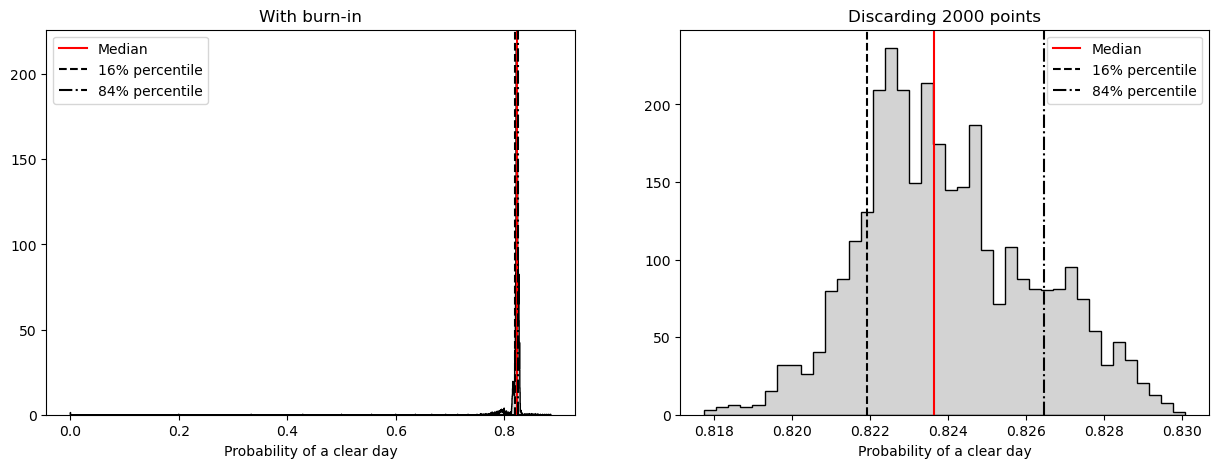

In [6]:
#Plotting the distribution of the trace with and without burn-in
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

fancyhist(trace, bins="freedman", density=True, ec='black', fc='lightgrey', histtype='stepfilled', ax = axs[0])
axs[0].set_xlabel('Probability of a clear day')
axs[0].set_title('With burn-in')
axs[0].axvline(np.median(trace), color = 'red', label = 'Median')
axs[0].axvline(np.percentile(trace, q=16), color = 'black', ls = '--', label = '16% percentile')
axs[0].axvline(np.percentile(trace, q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[0].legend()

fancyhist(trace[burnin:], bins="freedman", density=True, ec='black', fc='lightgrey', histtype='stepfilled', ax = axs[1])
axs[1].set_xlabel('Probability of a clear day')
axs[1].set_title('Discarding %i points' %(burnin))
axs[1].axvline(np.median(trace[burnin:]), color = 'red', label = 'Median')
axs[1].axvline(np.percentile(trace[burnin:], q=16), color = 'black', ls = '--', label = '16% percentile')
axs[1].axvline(np.percentile(trace[burnin:], q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[1].legend()

plt.show()

## Stock market

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

- 0 = stagnant
- 1 = bull
- 2 = bear

In [7]:
#Building the chain
N = 10**4
stock = [0]

values_stock = [0, 1, 2]
for i in tqdm(range(N-1)):
    if stock[i] == 0:
        stock.append(np.random.choice(values_stock, p = [0.5, 0.25, 0.25]))
    if stock[i] == 1:
        stock.append(np.random.choice(values_stock, p = [0.025, 0.9, 0.075]))
    if stock[i] == 2:
        stock.append(np.random.choice(values_stock, p = [0.05, 0.15, 0.8]))

stock = np.array(stock)

100%|██████████| 9999/9999 [00:00<00:00, 28256.91it/s]


In [8]:
print('Probability of stagnant market: %0.2f%%' %(len(stock[stock==0])*100/len(stock)))
print('Probability of bull market: %0.2f%%' %(len(stock[stock==1])*100/len(stock)))
print('Probability of bear market: %0.2f%%' %(len(stock[stock==2])*100/len(stock)))

Probability of stagnant market: 6.26%
Probability of bull market: 64.29%
Probability of bear market: 29.45%


In [9]:
#Computing the traces
stock_stagnant = np.copy(stock)
stock_stagnant[stock_stagnant == 0] = -1
stock_stagnant[(stock_stagnant == 1) | (stock_stagnant == 2)] = 0
stock_stagnant[stock_stagnant == -1] = 1
trace_stagnant = np.cumsum(stock_stagnant)/np.arange(1, len(stock_stagnant) + 1)

stock_bull = np.copy(stock)
stock_bull[stock_bull == 2] = 0
trace_bull = np.cumsum(stock_bull)/np.arange(1, len(stock_bull) + 1)

stock_bear = np.copy(stock)
stock_bear[stock_bear == 1] = 0
stock_bear[stock_bear == 2] = 1
trace_bear = np.cumsum(stock_bear)/np.arange(1, len(stock_bear) + 1)

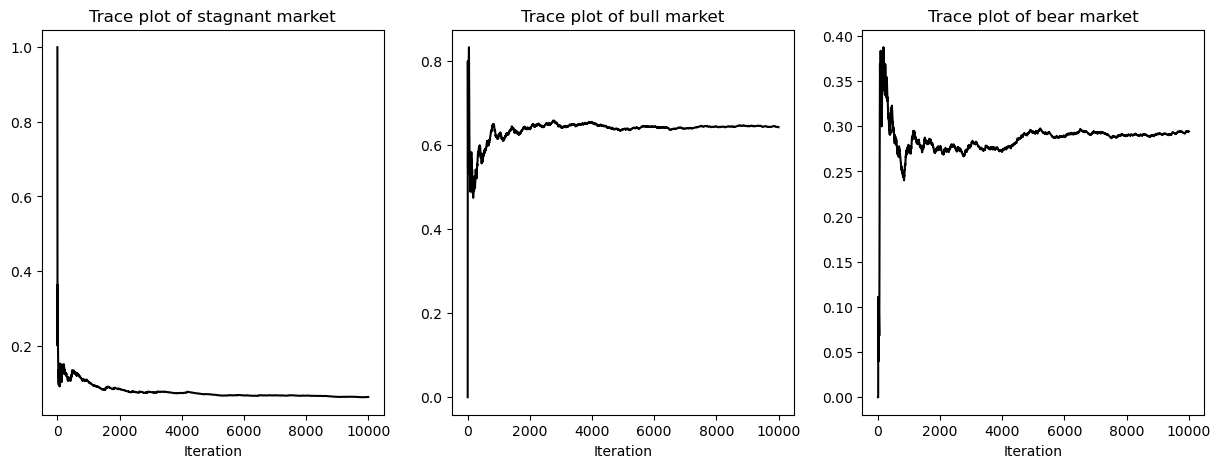

In [10]:
#Plotting the traces
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(trace_stagnant, color = 'black')
axs[0].set_title('Trace plot of stagnant market')
axs[0].set_xlabel('Iteration')

axs[1].plot(trace_bull, color = 'black')
axs[1].set_title('Trace plot of bull market')
axs[1].set_xlabel('Iteration')

axs[2].plot(trace_bear, color = 'black')
axs[2].set_title('Trace plot of bear market')
axs[2].set_xlabel('Iteration')

plt.show()

#### Stagnant market

In [11]:
#Printing the summary statistics of stagnant market with and without burn-in
burnin = 2000

print('Summary statistics with burn-in:')
print('Mean = %f' %np.mean(trace_stagnant))
print('Median = %f' %np.median(trace_stagnant))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_stagnant))
print('Min = %f\nMax =  %f' %(min(trace_stagnant), max(trace_stagnant)))

print('\nSummary statistics without burn-in:')
print('Mean = %f' %np.mean(trace_stagnant[burnin:]))
print('Median = %f' %np.median(trace_stagnant[burnin:]))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_stagnant[burnin:]))
print('Min = %f\nMax =  %f' %(min(trace_stagnant[burnin:]), max(trace_stagnant[burnin:])))

Summary statistics with burn-in:
Mean = 0.076200
Median = 0.068683
SigmaG = 0.007787
Min = 0.061809
Max =  1.000000

Summary statistics without burn-in:
Mean = 0.068877
Median = 0.066807
SigmaG = 0.005810
Min = 0.061809
Max =  0.083958


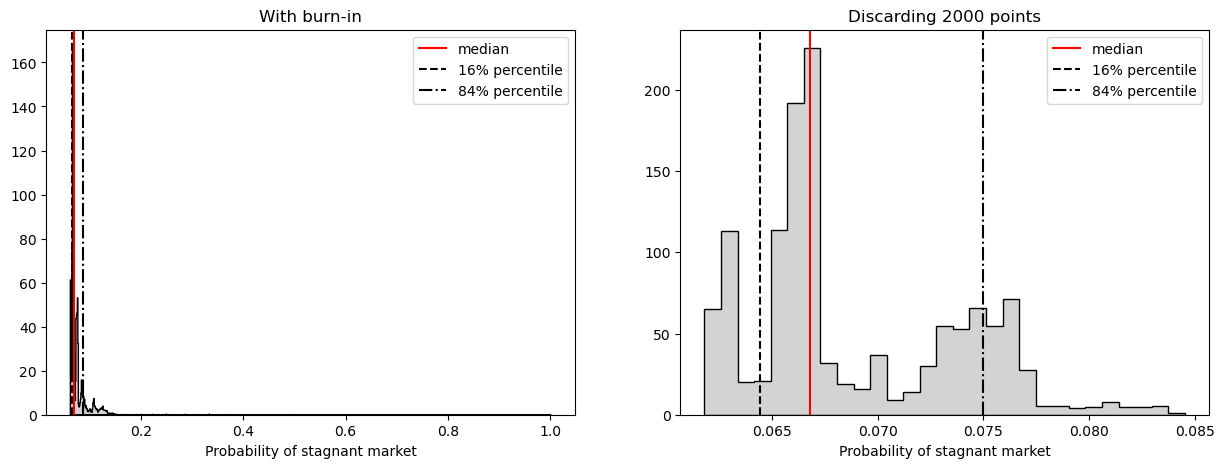

In [12]:
#Plotting the distribution of the trace of stagnant market with and without burn-in
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

fancyhist(trace_stagnant, bins="freedman", density=True, ec='black', fc='lightgrey', histtype='stepfilled', ax = axs[0])
axs[0].set_xlabel('Probability of stagnant market')
axs[0].set_title('With burn-in')
axs[0].axvline(np.median(trace_stagnant), color = 'red', label = 'median')
axs[0].axvline(np.percentile(trace_stagnant, q=16), color = 'black', ls = '--', label = '16% percentile')
axs[0].axvline(np.percentile(trace_stagnant, q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[0].legend()

fancyhist(trace_stagnant[burnin:], bins="freedman", density=True, ec='black', fc='lightgrey', histtype='stepfilled', ax = axs[1])
axs[1].set_xlabel('Probability of stagnant market')
axs[1].set_title('Discarding %i points' %(burnin))
axs[1].axvline(np.median(trace_stagnant[burnin:]), color = 'red', label = 'median')
axs[1].axvline(np.percentile(trace_stagnant[burnin:], q=16), color = 'black', ls = '--', label = '16% percentile')
axs[1].axvline(np.percentile(trace_stagnant[burnin:], q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[1].legend()

plt.show()

#### Bull market

In [13]:
#Printing the summary statistics of bull market with and without burn-in
burnin = 2000

print('Summary statistics with burn-in:')
print('Mean = %f' %np.mean(trace_bull))
print('Median = %f' %np.median(trace_bull))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_bull))
print('Min = %f\nMax =  %f' %(min(trace_bull), max(trace_bull)))

print('\nSummary statistics without burn-in:')
print('Mean = %f' %np.mean(trace_bull[burnin:]))
print('Median = %f' %np.median(trace_bull[burnin:]))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_bull[burnin:]))
print('Min = %f\nMax =  %f' %(min(trace_bull[burnin:]), max(trace_bull[burnin:])))

Summary statistics with burn-in:
Mean = 0.637912
Median = 0.643703
SigmaG = 0.004703
Min = 0.000000
Max =  0.833333

Summary statistics without burn-in:
Mean = 0.644524
Median = 0.644358
SigmaG = 0.003272
Min = 0.634310
Max =  0.658794


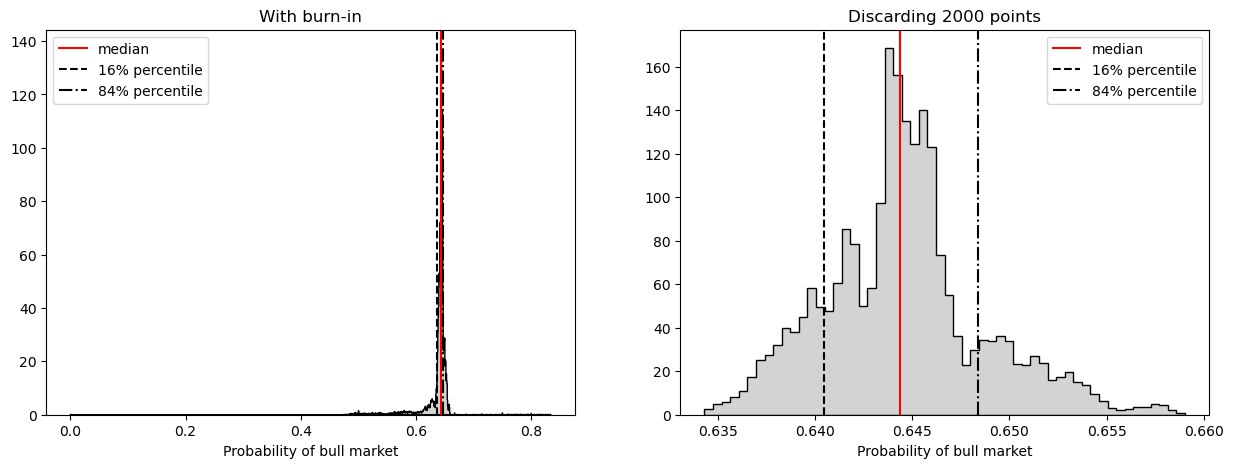

In [14]:
#Plotting the distribution of the trace of bull market with and without burn-in
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

fancyhist(trace_bull, bins="freedman", density=True, ec='black', fc='lightgrey', histtype='stepfilled', ax = axs[0])
axs[0].set_xlabel('Probability of bull market')
axs[0].set_title('With burn-in')
axs[0].axvline(np.median(trace_bull), color = 'red', label = 'median')
axs[0].axvline(np.percentile(trace_bull, q=16), color = 'black', ls = '--', label = '16% percentile')
axs[0].axvline(np.percentile(trace_bull, q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[0].legend()

fancyhist(trace_bull[burnin:], bins="freedman", density=True, ec='black', fc='lightgrey', histtype='stepfilled', ax = axs[1])
axs[1].set_xlabel('Probability of bull market')
axs[1].set_title('Discarding %i points' %(burnin))
axs[1].axvline(np.median(trace_bull[burnin:]), color = 'red', label = 'median')
axs[1].axvline(np.percentile(trace_bull[burnin:], q=16), color = 'black', ls = '--', label = '16% percentile')
axs[1].axvline(np.percentile(trace_bull[burnin:], q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[1].legend()

plt.show()

#### Bear market

In [15]:
#Printing the summary statistics of bear market with and without burn-in
burnin = 2000

print('Summary statistics with burn-in:')
print('Mean = %f' %np.mean(trace_bear))
print('Median = %f' %np.median(trace_bear))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_bear))
print('Min = %f\nMax =  %f' %(min(trace_bear), max(trace_bear)))

print('\nSummary statistics without burn-in:')
print('Mean = %f' %np.mean(trace_bear[burnin:]))
print('Median = %f' %np.median(trace_bear[burnin:]))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_bear[burnin:]))
print('Min = %f\nMax =  %f' %(min(trace_bear[burnin:]), max(trace_bear[burnin:])))

Summary statistics with burn-in:
Mean = 0.285888
Median = 0.289450
SigmaG = 0.011077
Min = 0.000000
Max =  0.387640

Summary statistics without burn-in:
Mean = 0.286599
Median = 0.290132
SigmaG = 0.010017
Min = 0.266715
Max =  0.297701


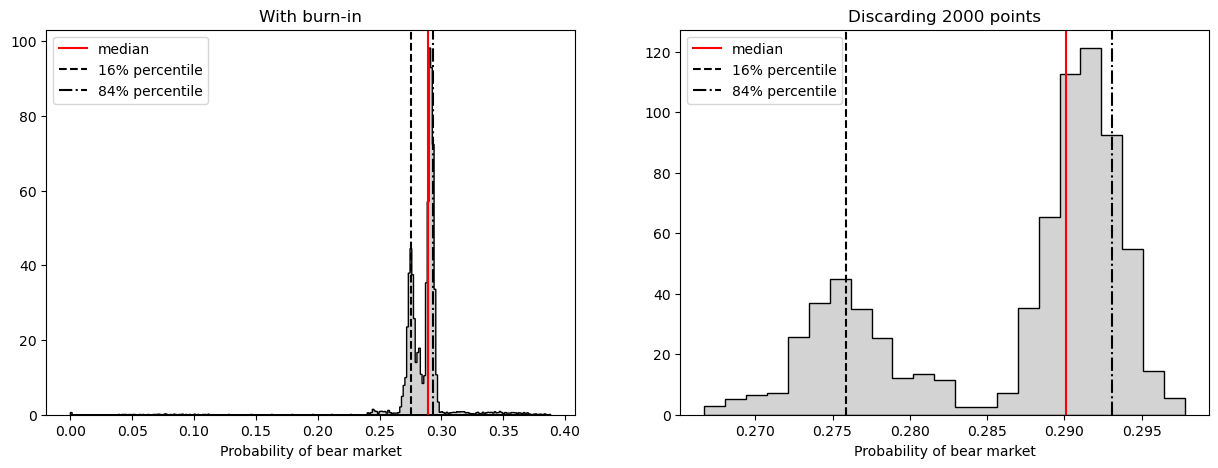

In [16]:
#Plotting the distribution of the trace of bear market with and without burn-in
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

fancyhist(trace_bear, bins="freedman", density=True, ec='black', fc='lightgrey', histtype='stepfilled', ax = axs[0])
axs[0].set_xlabel('Probability of bear market')
axs[0].set_title('With burn-in')
axs[0].axvline(np.median(trace_bear), color = 'red', label = 'median')
axs[0].axvline(np.percentile(trace_bear, q=16), color = 'black', ls = '--', label = '16% percentile')
axs[0].axvline(np.percentile(trace_bear, q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[0].legend()

fancyhist(trace_bear[burnin:], bins="freedman", density=True, ec='black', fc='lightgrey', histtype='stepfilled', ax = axs[1])
axs[1].set_xlabel('Probability of bear market')
axs[1].set_title('Discarding %i points' %(burnin))
axs[1].axvline(np.median(trace_bear[burnin:]), color = 'red', label = 'median')
axs[1].axvline(np.percentile(trace_bear[burnin:], q=16), color = 'black', ls = '--', label = '16% percentile')
axs[1].axvline(np.percentile(trace_bear[burnin:], q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[1].legend()

plt.show()